# Прогнозирование температуры звезды

## Введение

Закзачик — обсерватория «Небо на ладони» — хочет перейти на технологии машинного обучения для определения температуры поверхности звезд. 

Для поиска решения на основе нейронных сетей заказчик предоставил харасктеристики и значения температуры 240 звезд. Характеристики данных следующие:
1. Относительная светимость $L/L_o$ — светимость звезды относительно Солнца.
1. Относительный радиус $R/R_o$ — радиус звезды относительно радиуса Солнца.
1. Абсолютная звёздная величина $M_v$ — физическая величина, характеризующая блеск звезды.
1. Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.
1. Тип звезды:
    - 0 — Коричневый карлик
    - 1 — Красный карлик
    - 2 — Белый карлик
    - 3 — Звёзды главной последовательности
    - 4 — Сверхгигант
    - 5 — Гипергигант
1. Абсолютная температура $T(K)$ — температура на поверхности звезды в Кельвинах. 

Заказчик ожидает, что разработанная модель будет иметь RMSE не более 4500.

Заказчик просит включит в отчет график «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, а по вертикальной — температура в Кельвинах.

### Цель проекта

Целью проекта является разработка архитектуры и обучение модели, предсказывающей температуру поверхности звезды. 

Качество модели оценивается метрикой среднеквадратичная ошибка (RMSE) и должно быть меньше или равно 4500.

### Основные этапы

В проекты выполнены следующие основные этапы:
- исследовательский анализ данных,
- разработка базовой модели,
- улучшение модели.

### Выводы

Мы разработали модель, позволяющую определять температуру звезды по 5 характеристикам. Среднквадратичная ошибка предсказания на тестовых данных 2000.



## Подготовка кода

### Загрузка библиотек

In [1]:
from os import path
import pandas as pd

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
RANDOM_STATE = 2575215

### Функции и классы

## Загрузка данных

In [3]:
remote_path = 'https://code.s3.yandex.net/datasets/6_class.csv'
local_path = path.join('.', 'data', '6_class.csv')

if path.isfile(local_path):
    data = pd.read_csv(local_path, index_col=0)
else:
    data = pd.read_csv(remote_path, index_col=0)
    if path.exists(path.dirname(local_path)):
        data.to_csv(local_path)
        
data.shape

(240, 6)

Загружено 240 строк данных и 6 признаков.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
data.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


Состав признаков и их значения соответствуют информации в задаче. 

Приведем названия признаков к snake-case.

In [6]:
data.columns = [
    'temperature', 'luminosity', 'radius', 'absolute_magnitude', 'star_type',
    'star_color'
]

### Разделение данных

Будем придреживаться принципа, согласно которому мы не должны видеть тестовые данные до этапа тестирования моделей. Поэтому выделим данные для теста до исследовательского анализа. Для теста оставим 10% даных.

In [15]:
X = data.drop('temperature', axis=1)
y = data.temperature
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.15,
                                                    random_state=RANDOM_STATE)

In [16]:
X_train.shape, y_train.shape

((204, 5), (204,))

In [17]:
X_test.shape, y_test.shape

((36, 5), (36,))

Размер выборок корректный.

Сравним статистики целевого признака для обучающей и тестовой выборок.

In [18]:
y_train.describe()

count      204.000000
mean     10504.230392
std       9581.423090
min       1939.000000
25%       3344.250000
50%       5776.000000
75%      15554.500000
max      40000.000000
Name: temperature, dtype: float64

In [19]:
y_test.describe()

count       36.000000
mean     10459.111111
std       9520.297072
min       2731.000000
25%       3353.750000
50%       5981.000000
75%      14106.250000
max      38234.000000
Name: temperature, dtype: float64

Статистики целевого признака на обучающей и тестовой выборке похожи. Разделение данных выполнено корректно.

### Вывод

Мы загрузили полученные данные. Состав признаков и количество объектов соответствуют указанным в задаче. 

Из данных мы выделили 15% объектов для тестирования результатов. 

Исследовательский анализ, обучение и настройку моделей будем проводить на обучающей выборки, из которой выделим валидационную.

## Исследовательский анализ данных

Сделаем датасет для анализа на основе обучающей выборки.

In [20]:
df = X_train.join(y_train).copy()

### Структура данных

В нашем датасете 240 объектов, 5 призаков и один целевой признак.

#### Типы данных признаков

In [22]:
df.dtypes

luminosity            float64
radius                float64
absolute_magnitude    float64
star_type               int64
star_color             object
temperature             int64
dtype: object

Целевой признак целочисленный, 3 признака имеют вещественный тип, один — целый и один — строковый. Целым и строковым типами представлены категориальные признаки.

Выделим названия целевого, численных и категориальных признаков.

In [24]:
target_column = ["temperature"]
numerical_columns = ["luminosity", "radius", "absolute_magnitude"]
categorical_columns = ["star_type", "star_color"]

#### Количество уникальных значений

In [23]:
df.nunique()

luminosity            180
radius                188
absolute_magnitude    194
star_type               6
star_color             18
temperature           194
dtype: int64

Все числовые признаки имеют сотни значений, то есть являются непрерывными.

#### Статистики числовых признаков

In [26]:
df[numerical_columns + target_column].describe()

,luminosity,radius,absolute_magnitude,temperature
count,204.000000,204.000000,204.000000,204.000000
mean,101994.531578,198.838847,4.707059,10504.230392
std,176958.624939,472.874682,10.408561,9581.423090
min,0.000080,0.008400,-11.920000,1939.000000
25%,0.000817,0.099525,-6.092500,3344.250000
50%,0.021500,0.590000,10.410000,5776.000000
75%,189750.000000,35.250000,13.697500,15554.500000
max,849420.000000,1948.500000,20.060000,40000.000000


Минимальное значение `luminosity` 0.00008, максимальное — 849420. Разница в 11 порядков. Медиана 0.02, среднее — 101994. 

У остальных признаков также видим большую разницу между максимумом и минимумом и смещение медианы от среднего. 

В нашем датасете очень разные звезды.

#### Вывод



Мы изучили структуру данных. Убедились, что данные соответсвуют описанным в задаче. 

Мы видим, что звезды в датасете очень сильно отличаются друг от друга по характеристам и распределение значений скошено.

### Качество данных

#### Дубликаты

In [27]:
duplicates_number = df.duplicated().sum()
print(f'Нашли {duplicates_number} дубликатов в датасете.')

Нашли 0 дубликатов в датасете.


#### Пропуски

In [28]:
df.isna().sum()

luminosity            0
radius                0
absolute_magnitude    0
star_type             0
star_color            0
temperature           0
dtype: int64

Пропусков тоже нет.

#### Паттерны и ошибки заполнения

Проверим наш датасет на проблемы с заполнением числовых значений.

Для каждого числового признака построим график, который визуализирует значения признака (ось Y) для каждого из объектов в датасете (ось X).

Мы ожидаем, что распределение значений будет охватывать весь диапазон по оси Y для всех объектов, то есть на всем протяжении оси X.

Пробелы по оси X покажут ошибки заполнения значений, а визуальные паттерны будут говорить о характере заполнения датасета.

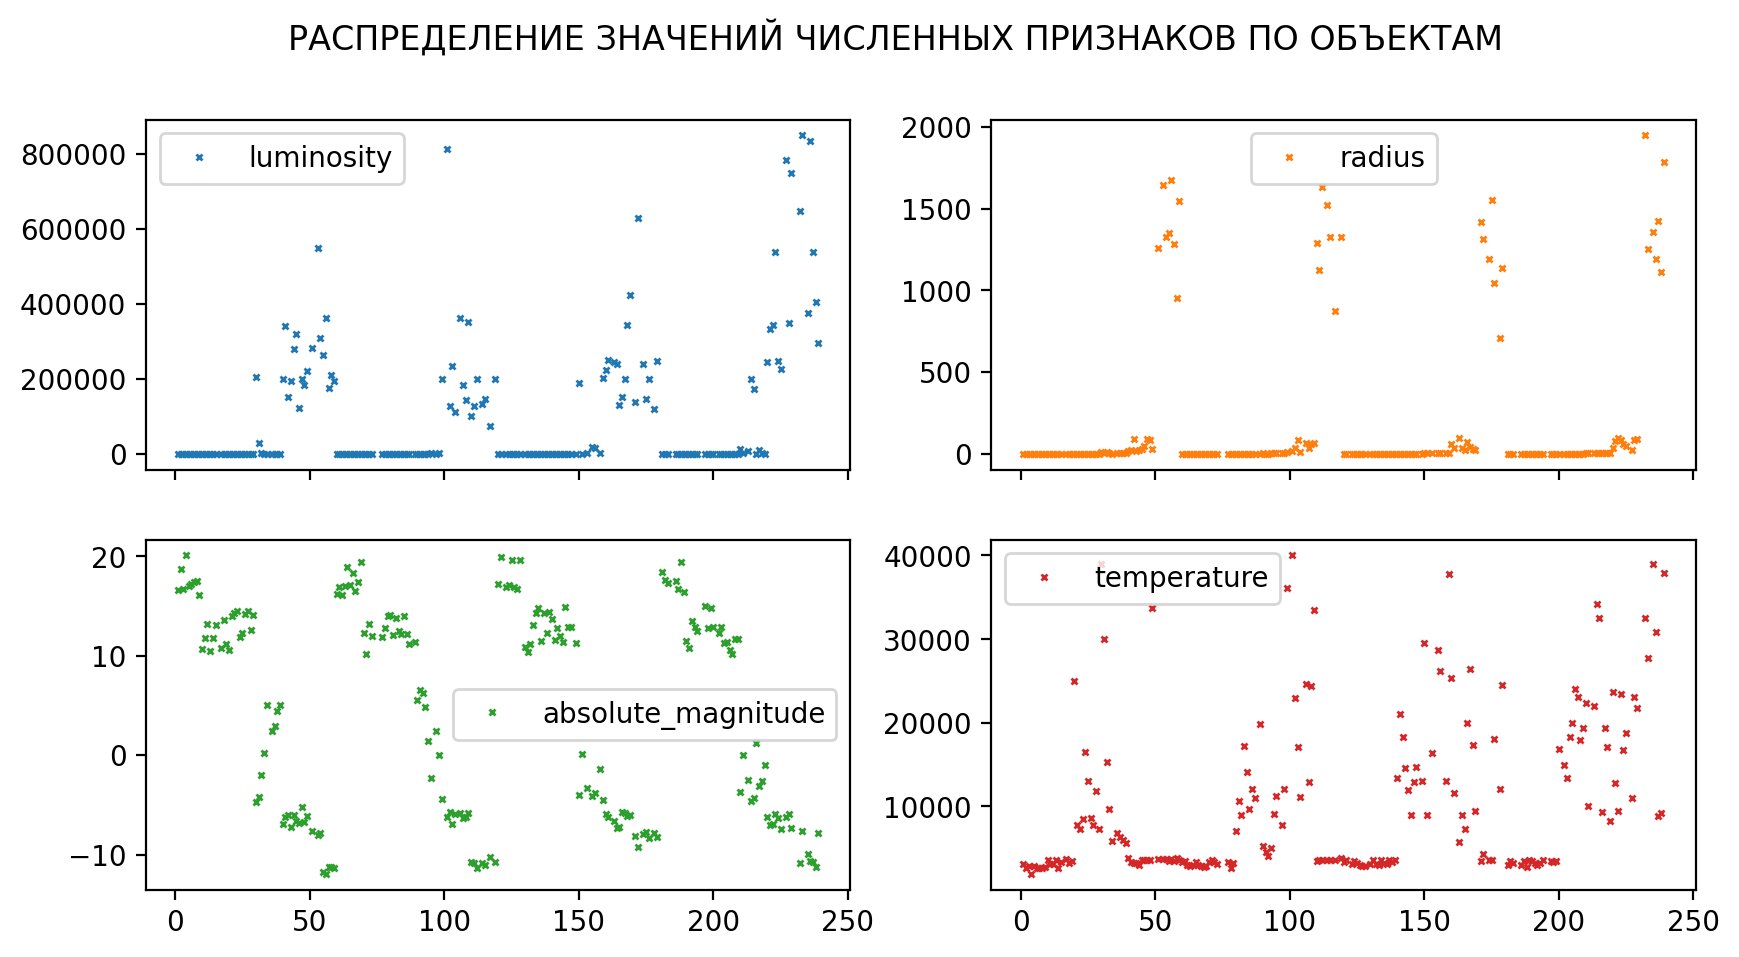

In [33]:
df[numerical_columns+target_column].plot(
    lw=0, marker="x", subplots=True, layout=(-1, 2),
    figsize=(10, 5), markersize=2, 
    title = 'Распределение значений численных признаков по объектам'.upper()
)
plt.legend(loc='upper left')
plt.show()

Мы видим, что датасет собран из 4 порций данных, в каждой из которых наблюдаем убвываение абсолютной зведной величины. 

Значения относительного радиуса группируются в два кластера: около нуля и 1000–2000.


Доля звезд с небольшой отсносительной светимостью и небольшим радиусом в датасете намного больше остальных. Мы наблюдаем дисбаланс данных.

Посмотрим на распределение объектов по категориям.

In [36]:
df.star_type.value_counts()

2    37
4    36
0    34
1    34
3    34
5    29
Name: star_type, dtype: int64

По типам звезд объекты распределены равномерно.

In [37]:
df.star_color.value_counts()

Red                   94
Blue                  48
Blue-white            19
Blue White            10
yellow-white           8
White                  6
Blue white             3
Yellowish White        3
yellowish              2
Orange                 2
white                  2
White-Yellow           1
Whitish                1
Blue white             1
Blue                   1
Yellowish              1
Blue-White             1
Pale yellow orange     1
Name: star_color, dtype: int64

Тут мы видим большое количество дубликтов в названиях категорий. Оъекты распределены неравномерно.

#### Выводы

В данных нет дубликатов и пропусков. 

Значения признаков относительный радиус и относительная светимости имют большой разброс. Мы видим много объектов с маленькими значениями и несколько объектов с очень большими значениями.

В категориальном признаке цвет звезды мы видим неявные дубли в значениях.  

### Содержание данных

#### Распределение значений

#### Взаимосвязь численных признаков

#### Анализ мультиколинеарности

- https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
- https://etav.github.io/python/vif_factor_python.html
- https://towardsdatascience.com/how-to-remove-multicollinearity-in-dataset-using-pca-4b4561c28d0b

### Выводы

## Подготовка данных

## Построение baseline модели

## Улучшение модели

## Выводы